# FashionMNIST classification, activations visualisations and investigation using PCA / t-SNE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.metrics import AUC
from keras import Model
from keras.models import save_model, load_model
from jupyterthemes import jtplot
from sklearn.decomposition import PCA
jtplot.style(theme='monokai', context='paper', ticks=True, grid=True)

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = (x_train/255)*2 - 1
x_test = (x_test/255)*2 - 1
labels = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','boot']

In [12]:
ip = Input((28,28,1))
x = Conv2D(filters=4,kernel_size=3,strides=1,activation='tanh')(ip)
x = MaxPooling2D()(x)
x = Conv2D(filters=4,kernel_size=3,strides=1,activation='tanh')(x)
x = MaxPooling2D()(x)
x = Conv2D(filters=4,kernel_size=3,strides=1,activation='tanh')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(len(labels),activation='softmax')(x)
model = Model(ip,x)
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 4)         148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 4)           148       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 4)          

In [13]:
H = model.fit(x_train,y_train,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
1688/1688 [==============================] - 165s 98ms/step - loss: 0.9317 - accuracy: 0.6847 - val_loss: 0.6464 - val_accuracy: 0.7605
Epoch 2/10
1688/1688 [==============================] - 156s 92ms/step - loss: 0.5959 - accuracy: 0.7848 - val_loss: 0.5580 - val_accuracy: 0.7907
Epoch 3/10
1688/1688 [==============================] - 122s 72ms/step - loss: 0.5320 - accuracy: 0.8101 - val_loss: 0.5209 - val_accuracy: 0.8085
Epoch 4/10
1688/1688 [==============================] - 134s 80ms/step - loss: 0.4970 - accuracy: 0.8244 - val_loss: 0.4888 - val_accuracy: 0.8180
Epoch 5/10
1688/1688 [==============================] - 132s 78ms/step - loss: 0.4730 - accuracy: 0.8319 - val_loss: 0.4719 - val_accuracy: 0.8260
Epoch 6/10
1688/1688 [==============================] - 173s 102ms/step - loss: 0.4560 - accuracy: 0.8376 - val_loss: 0.4585 - val_accuracy: 0.8290
Epoch 7/10
1688/1688 [==============================] - 170s 100ms/step - loss: 0.4430 - accuracy: 0.8415 - val_loss:

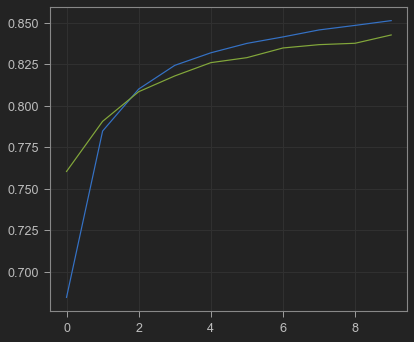

In [14]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy']);

In [15]:
save_model(model,'fashionMNIST.h5')

In [16]:
weights_model = Model(model.input, [l.output for l in model.layers])

In [17]:
weights = weights_model.predict(x_train[0:8])

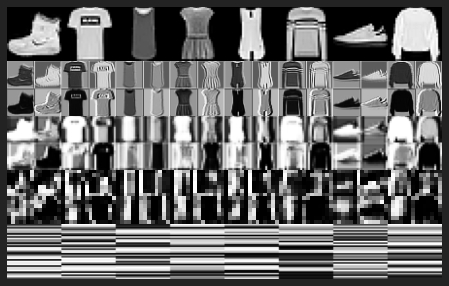

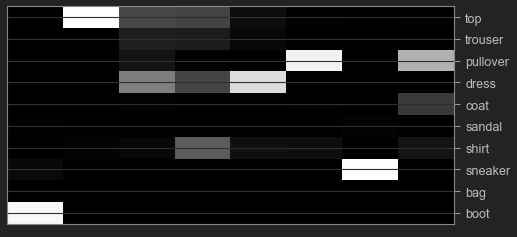

In [89]:
plt.figure(figsize=(8,5))
plt.subplot(5,1,1)
w = weights[0]
sz = 64
plt.imshow(np.concatenate([w[i,:,:,0] for i in range(w.shape[0])],1),cmap='gray')
plt.axis('off')
w = weights[1]
plt.subplot(5,1,2)
plt.imshow(np.concatenate([
    np.concatenate([
        np.concatenate([w[i,:,:,j] for j in range(2)],axis=0),
        np.concatenate([w[i,:,:,j] for j in range(2,4)],axis=0)
    ],axis=1) for i in range(w.shape[0])],axis=1),cmap='gray')
plt.axis('off')
w = weights[3]
plt.subplot(5,1,3)
plt.imshow(np.concatenate([
    np.concatenate([
        np.concatenate([w[i,:,:,j] for j in range(2)],axis=0),
        np.concatenate([w[i,:,:,j] for j in range(2,4)],axis=0)
    ],axis=1) for i in range(w.shape[0])],axis=1),cmap='gray')
plt.axis('off')
w = weights[5]
plt.subplot(5,1,4)
plt.imshow(np.concatenate([
    np.concatenate([
        np.concatenate([w[i,:,:,j] for j in range(2)],axis=0),
        np.concatenate([w[i,:,:,j] for j in range(2,4)],axis=0)
    ],axis=1) for i in range(w.shape[0])],axis=1),cmap='gray',)
plt.axis('off')
w = weights[7]
plt.subplot(5,1,5)
plt.imshow(np.concatenate([np.repeat(v.reshape(-1,1),28,axis=1) for v in w],axis=1),cmap='gray',aspect=28/36)
plt.axis('off')
plt.subplots_adjust(wspace=0,hspace=0)
plt.figure(figsize=(8,4))
plt.imshow(weights[-1].T,aspect='auto',cmap='gray',)
plt.yticks(range(len(labels)),labels);
plt.gca().yaxis.tick_right()
plt.grid('off')
plt.xticks([]);

The above code shows the output from each layer in the neural network. The first row is just the input images. The second, third and fourth rows each consist of the four filter outputs from the convolutional + maxpooling layer for each image in the batch. The fifth row is an attempt to show the flattened output before it passes into the final dense layer. This is a vector of length 36 for each image in the batch, visualised as bars of different brightnesses. The final plot shows the model output, with the brightest cell corresponding to the prediction for that image.

# Visualising flatten layer using PCA

The convolutional layers pick up on certain aspects of the images, such as edges or shapes. After passing through these, the model flattens the outputs into a vector of length 36. I was curious to visualise this vector for each input, to see how the different classes are distributed. Since the final dense layer uses only these 36 values for its prediction, there ought to be a good separation of classes. PCA (Principal component analysis) reduces higher-dimensionality information into a low dimension representation. In this way, we can view the distribution of classes in a 2D mapping.

In [124]:
xvis, yvis = x_train[:2000], y_train[:2000]
weights = weights_model.predict(xvis)

In [125]:
pca = PCA(n_components=2)

In [126]:
w_trans = pca.fit_transform(weights[7])

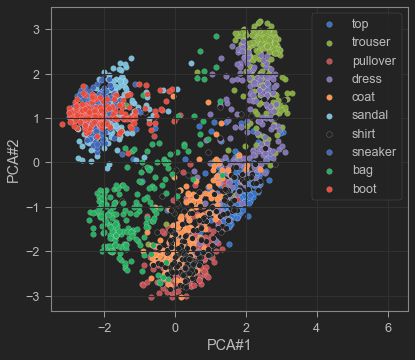

In [127]:
for i,lab in enumerate(labels):
    plt.scatter(
        w_trans[yvis==i][:,0],
        w_trans[yvis==i][:,1],
        label = lab,
        edgecolors='w'
    )
plt.xlim(np.min(w_trans[:,0])*1.1, np.max(w_trans[:,0])*2)
plt.legend();
plt.xlabel('PCA#1');
plt.ylabel('PCA#2');

There is some clustering of classes here. Another method to visualise high dimensional data is t-SNE (t-distributed stochastic neighbor embedding). 

# Visualising flatten layer using t-SNE

In [128]:
from sklearn.manifold import TSNE

In [129]:
tsne = TSNE(n_components=2, verbose=1)
tsne_res = tsne.fit_transform(weights[7])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.026s...
[t-SNE] Computed neighbors for 2000 samples in 0.664s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.890190
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.005020
[t-SNE] KL divergence after 1000 iterations: 0.870844


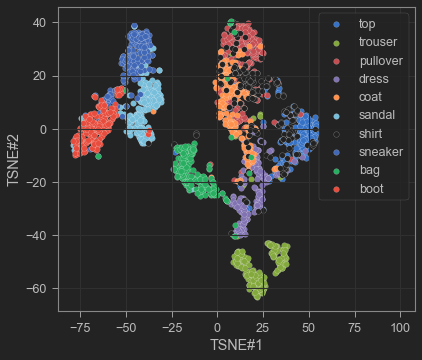

In [130]:
for i,lab in enumerate(labels):
    plt.scatter(
        tsne_res[yvis==i][:,0],
        tsne_res[yvis==i][:,1],
        label = lab,
        edgecolors='w'
    )
plt.xlim(np.min(tsne_res[:,0])*1.1, np.max(tsne_res[:,0])*2)
plt.legend();
plt.xlabel('TSNE#1');
plt.ylabel('TSNE#2');

We can see that the different classes are much more clearly separated using t-SNE. It makes sense that the model is now able to achieve decent accuracy. It would also be possible to visualise the classes in 3D, where the separation might be even clearer.

Next, I decided to visualise the input images directly using t-SNE. Is it possible to separate out the classes using only the flattened image data, without the use of the trained convolutional filters?

# Visualising input data using t-SNE

In [133]:
xvis, yvis = x_train[:2000], y_train[:2000]
xvis = xvis.reshape(xvis.shape[0],-1)
tsne = TSNE(n_components=2, verbose=1)
tsne_res = tsne.fit_transform(xvis)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.702s...
[t-SNE] Computed neighbors for 2000 samples in 17.633s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 3.997823
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.824753
[t-SNE] KL divergence after 1000 iterations: 0.920252


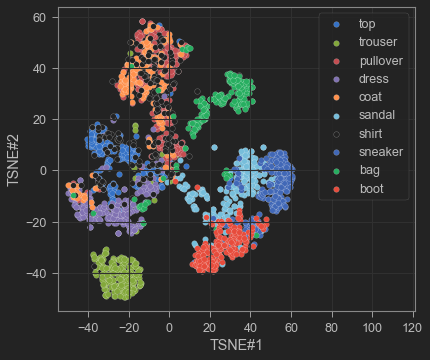

In [134]:
for i,lab in enumerate(labels):
    plt.scatter(
        tsne_res[yvis==i][:,0],
        tsne_res[yvis==i][:,1],
        label = lab,
        edgecolors='w'
    )
plt.xlim(np.min(tsne_res[:,0])*1.1, np.max(tsne_res[:,0])*2)
plt.legend();
plt.xlabel('TSNE#1');
plt.ylabel('TSNE#2');

Interestingly, there does appear to be separation of classes here, so perhaps a neural network without any convolutional layers would be able to classify the images up to a point. 
The separation does not appear to be as good as for the previous example, and there is some overlap between classes.

# Test with very simple NN
To have a comparably small number of parameters, I first put a couple of maxpool layers to reduce the resolution.

In [7]:
ip = Input((28,28,1))
x = MaxPooling2D()(ip)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(len(labels),activation='softmax')(x)
nnmodel = Model(ip,x)
nnmodel.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
nnmodel.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 1)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 1)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 49)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                500       
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


In [8]:
H = nnmodel.fit(x_train,y_train,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 1.0615 - accuracy: 0.6240 - val_loss: 0.7885 - val_accuracy: 0.7035
Epoch 2/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.7600 - accuracy: 0.7262 - val_loss: 0.7137 - val_accuracy: 0.7368
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.7157 - accuracy: 0.7395 - val_loss: 0.6857 - val_accuracy: 0.7512
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.6948 - accuracy: 0.7468 - val_loss: 0.6688 - val_accuracy: 0.7477
Epoch 5/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.6823 - accuracy: 0.7510 - val_loss: 0.6603 - val_accuracy: 0.7557
Epoch 6/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.6744 - accuracy: 0.7535 - val_loss: 0.6529 - val_accuracy: 0.7570
Epoch 7/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.6687 - accuracy: 0.7546 - val_loss: 0.6502 - val_ac

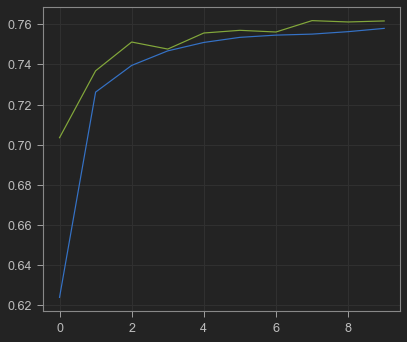

In [9]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy']);

Even this very simple model operating on low-res data is able to get 75% accuracy